### **SLP : Single Layer Perceptron**

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# === Step Activation Function ===
def activation_function(x):
    return np.where(x >= 0, 1, 0)

# === Single Layer Perceptron ===
class SingleLayerPerceptron:
    def __init__(self, input_size, weight, bias, learning_rate, epochs):
        self.w = weight
        self.b = bias
        self.lr = learning_rate
        self.epochs = epochs
        self.errors_per_epoch = []
        self.accuracy_per_epoch = []

    def predict(self, x):
        output = np.dot(x, self.w) + self.b
        return activation_function(output)

    def fit(self, X, y):
        for epoch in range(1, self.epochs + 1):
            errors = 0
            for input, target in zip(X, y):
                prediction = self.predict(input)
                error = target - prediction
                if error != 0:
                    errors += 1
                self.w = self.w + self.lr * error * input
                self.b = self.b + self.lr * error
            acc = np.mean([self.predict(xi) == yi for xi, yi in zip(X, y)])
            self.errors_per_epoch.append(errors)
            self.accuracy_per_epoch.append(acc)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Accuracy = {acc:.2f}, Errors = {errors}")

# === Dataset ===
X = np.array([
    [2, 1],
    [1, -1],
    [-1, -2],
    [-2, 1]
])
y = np.array([1, 0, 0, 1])

# === Hyperparameters ===
input_size = X.shape[1]
weight = np.array([0.5, -0.5])
bias = 0.1
learning_rate = 0.01
epochs = 50

# === Train the model ===
model = SingleLayerPerceptron(input_size, weight, bias, learning_rate, epochs)
model.fit(X, y)

# === Predictions ===
print("\nPredictions on training data with true labels:")
for sample, true_label in zip(X, y):
    prediction = model.predict(sample)
    print(f"{sample} → {prediction} : {true_label}")

print("\nBatch predictions:", model.predict(X))

Epoch 10: Accuracy = 0.50, Errors = 2
Epoch 20: Accuracy = 1.00, Errors = 0
Epoch 30: Accuracy = 1.00, Errors = 0
Epoch 40: Accuracy = 1.00, Errors = 0
Epoch 50: Accuracy = 1.00, Errors = 0

Predictions on training data with true labels:
[2 1] → 1 : 1
[ 1 -1] → 0 : 0
[-1 -2] → 0 : 0
[-2  1] → 1 : 1

Batch predictions: [1 0 0 1]


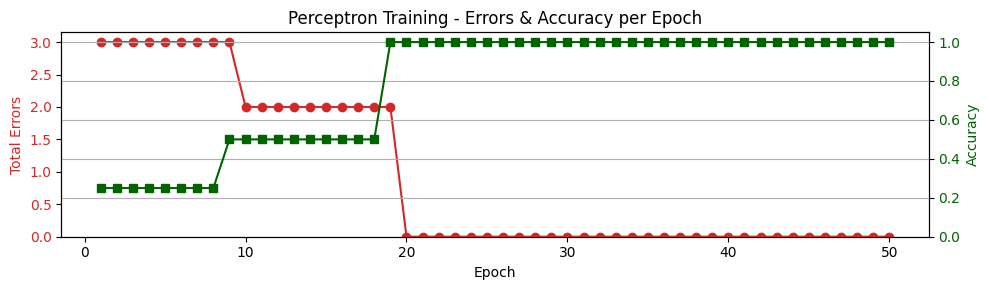

In [41]:
# === Plot errors and accuracy ===
fig, ax1 = plt.subplots(figsize=(10, 3))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Total Errors', color=color)
ax1.plot(range(1, epochs + 1), model.errors_per_epoch, marker='o', color=color, label='Errors')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
color = 'darkgreen'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(range(1, epochs + 1), model.accuracy_per_epoch, marker='s', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.05)

plt.title("Perceptron Training - Errors & Accuracy per Epoch")
fig.tight_layout()
plt.grid(True)
plt.show()

### **Pre-Build SLP**

In [77]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# === Create a Binary Classification Dataset ===
X = np.array([
    [2, 1],
    [1, -1],
    [-1, -2],
    [-2, 1]
])
y = np.array([1, 0, 0, 1])

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Initialize Prebuilt Single Layer Perceptron ===
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# === Train the model ===
model.fit(X_train, y_train)

# === Predict ===
y_pred = model.predict(X_test)

# === Evaluate ===
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [79]:
print("\nBatch predictions:", model.predict(X))


Batch predictions: [1 0 0 1]


### **MLP : Multi-Layer Perceptron**

In [81]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs = 100):
        self.input_size = input_size # no.of features in the input layer
        self.hidden_size = hidden_size # no. of neurons in the hidden layer
        self.output_size = output_size # no. of neurons in the output layer
        self.learning_rate = learning_rate # learning rate for gradient descent step
        self.epochs = epochs

        ## Input Layer to Hidden Layer ##
        # weights and bias initialization
        self.W1 = np.random.randn(self.input_size, self.hidden_size)*0.01
        self.b1 = np.zeros((1,self.hidden_size))
        ## Hidden Layer to Output Layer ##
        # Random weights from hiden layer to output layer and bias for output layer
        self.W2 = np.random.randn(self.hidden_size,self.output_size)*0.01
        self.b2 = np.zeros((1,self.output_size))
        # Loss History & accuracy history for plotting
        self.loss_history = []
        self.accuracy_history = []

    """
    Activation Function
    """
    # ReLU activation function
    def relu(self, z):
        return np.maximum(0,z)

    # Derivative of ReLU for BackPropagation
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0)

    # Softmax for multiclass classification
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z,axis = 1, keepdims = True)) # subtract max for numerical stability
        return exp_values/np.sum(exp_values, axis = 1, keepdims = True)

    """
    Forward Propagation
    """
    def forward(self, x):
        ## Input Layer to Hidden Layer ##
        # computes the activated value in the hidden layer using ReLU function
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        ## Hidden Layer to Output Layer ##
        # computes the probabilities using softmax for multi-class classification
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2)

        return self.probs

    """
    Loss Computation
    """
    # cross-entropy loss for multiclass classification
    def compute_loss(self, y_true, probs):
        loss = -np.mean(np.sum(y_true*np.log(probs), axis = 1))
        return loss

    # compute accuracy
    def compute_accuracy(self, y_true, probs):
        predictions = np.argmax(probs, axis = 1)
        true_labels = np.argmax(y_true, axis = 1)
        return np.mean(predictions == true_labels)

    """
    Backward Propagation
    """
    def backward(self, x, y):
        m = x.shape[0]
        # Gradients of the loss w.r.t weights and biases of the ouput layer
        delta3 = self.probs - y
        dW2 = np.dot(self.a1.T, delta3)/m
        db2 = np.sum(delta3, axis = 0, keepdims = True)/m
        # Gradients of the loss w.r.t weights and biases of the hidden layer
        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(x.T, delta2)/m
        db1 = np.sum(delta2, axis = 0, keepdims = True)/m
        # Update the parameters : weights and biases across the layers
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    """
    Training
    """
    def fit(self, x, y):
        for epoch in range(1, self.epochs+1):
            # Forward Pass
            probs = self.forward(x)
            # Compute the categorical cross-entropy loss
            loss = self.compute_loss(y, probs)
            accuracy = self.compute_accuracy(y,probs)
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)
            # Backward pass
            self.backward(x, y)
            # Print the progress after every 10 epochs
            if epoch % 100 == 0:
                print(f'Epoch : {epoch}, Loss : {loss:.4f}, Accuracy : {accuracy:.4f}')

    """
    Testing
    """
    def test(self, x_test, y_test):
        probs = self.forward(x_test)
        loss = self.compute_loss(y_test, probs)
        accuracy = self.compute_accuracy(y_test, probs)
        print(f'Test Loss : {loss:.4f}, Test Accuracy : {accuracy:.4f}')
        return loss, accuracy

    """
    Predict class labels for new data
    """
    def predict(self, x):
        probs = self.forward(x)
        return np.argmax(probs, axis=1)  # return class label (not one-hot)

In [82]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# === Generate Toy Dataset ===
X, y = make_classification(n_samples=3000, n_features=4, n_informative=4, n_redundant=0,
                           n_classes=4, n_clusters_per_class=1, random_state=42)

# === One-hot encode the labels ===
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# === Import and initialize your NeuralNetwork ===

# === Initialize and Train the Model ===
input_size = X_train.shape[1]      # 4 features
hidden_size = 8                    # you can experiment with this
output_size = y_encoded.shape[1]   # 3 classes

model = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# === Evaluate on Test Set ===
model.test(X_test, y_test)

Epoch : 100, Loss : 1.1323, Accuracy : 0.6038
Epoch : 200, Loss : 0.7177, Accuracy : 0.7704
Epoch : 300, Loss : 0.6222, Accuracy : 0.7896
Epoch : 400, Loss : 0.5893, Accuracy : 0.7937
Epoch : 500, Loss : 0.5683, Accuracy : 0.7979
Epoch : 600, Loss : 0.5436, Accuracy : 0.8071
Epoch : 700, Loss : 0.5180, Accuracy : 0.8229
Epoch : 800, Loss : 0.4940, Accuracy : 0.8296
Epoch : 900, Loss : 0.4719, Accuracy : 0.8383
Epoch : 1000, Loss : 0.4531, Accuracy : 0.8454
Test Loss : 0.4532, Test Accuracy : 0.8333


(np.float64(0.4531918311260002), np.float64(0.8333333333333334))

In [83]:
# === Predict class for test set ===
y_pred = model.predict(X_test)

# Decode one-hot encoded true labels
y_true = np.argmax(y_test, axis=1)

# Show first 10 predictions
print("\nSample Predictions (first 10):")
for i in range(10):
    print(f"Input: {X_test[i]} → Predicted Class: {y_pred[i]}, True Class: {y_true[i]}")


Sample Predictions (first 10):
Input: [-0.43442417 -0.46169937 -1.53878005 -1.63052875] → Predicted Class: 0, True Class: 0
Input: [-1.43870852  0.0423682   0.82782517 -0.13841016] → Predicted Class: 2, True Class: 2
Input: [-3.00657969  0.63359946  0.97453006 -1.45922101] → Predicted Class: 2, True Class: 2
Input: [-1.4563583   0.01398232  1.2157411  -0.79642515] → Predicted Class: 2, True Class: 1
Input: [-0.41945467  1.77553142  1.6020883  -1.81098084] → Predicted Class: 2, True Class: 2
Input: [ 0.40964723  0.19507577 -2.12551391 -2.69202602] → Predicted Class: 0, True Class: 0
Input: [ 1.4333383 -1.7495421 -2.6719898  2.8024106] → Predicted Class: 3, True Class: 3
Input: [-0.83442847 -0.20696719  0.33289537  0.51049123] → Predicted Class: 2, True Class: 2
Input: [-1.75642045  0.89700188  1.81224623 -1.49729893] → Predicted Class: 2, True Class: 2
Input: [-1.91529026  1.54990413  1.20641807 -2.05989548] → Predicted Class: 2, True Class: 2


In [84]:
# === Predict on a custom input sample ===
new_sample = np.array([[0.5, -1.2, 0.3, 2.1]])
predicted_class = model.predict(new_sample)[0]
print("\nPrediction for custom input:", new_sample)
print("Predicted Class:", predicted_class)


Prediction for custom input: [[ 0.5 -1.2  0.3  2.1]]
Predicted Class: 2


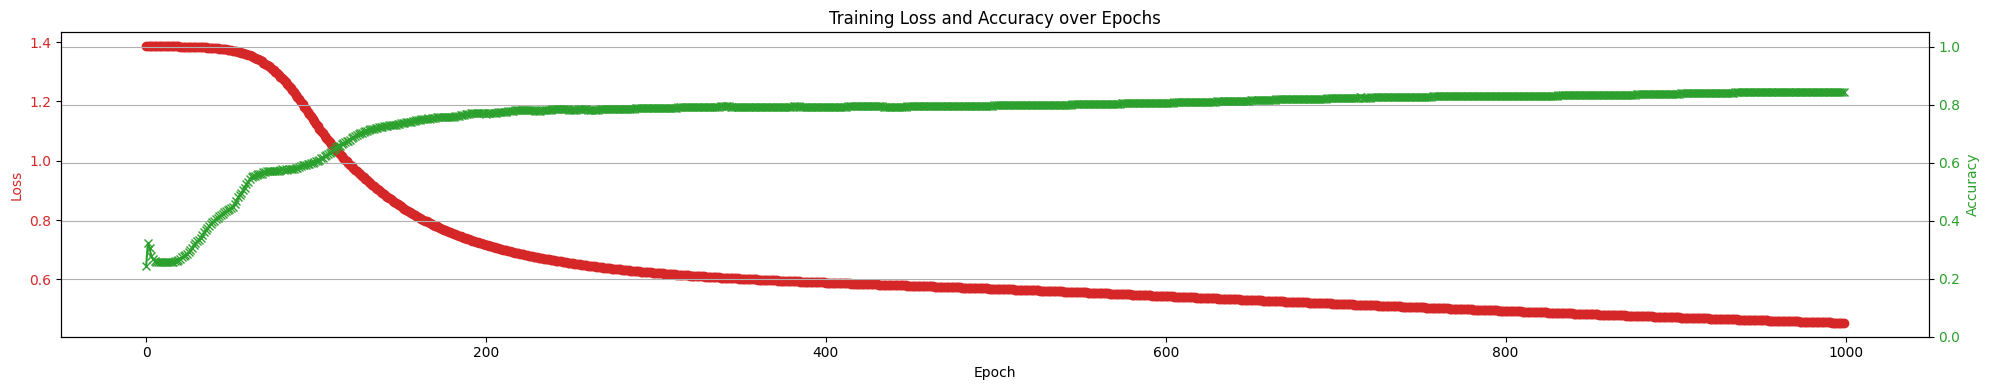

In [85]:
import matplotlib.pyplot as plt

def plot_training_curves(model):
    epochs_range = range(len(model.loss_history))

    fig, ax1 = plt.subplots(figsize=(20, 4))

    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs_range, model.loss_history, color=color, marker='o', label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epochs_range, model.accuracy_history, color=color, marker='x', label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 1.05)

    plt.title('Training Loss and Accuracy over Epochs')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Call the plot
plot_training_curves(model)

### **Pre-Build MLP**

In [91]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# === Generate Toy Dataset ===
X, y = make_classification(n_samples=3000, n_features=4, n_informative=4, n_redundant=0,
                           n_classes=4, n_clusters_per_class=1, random_state=42)

# === One-hot encode the labels ===
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Prebuilt MLP model ===
model = MLPClassifier(hidden_layer_sizes=(10, 8),   # 2 hidden layers: 10 & 8 neurons
                      activation='relu',            # ReLU activation
                      solver='adam',                # Adam optimizer
                      max_iter=2000,                # Number of training epochs
                      random_state=42)

# === Train the model ===
model.fit(X_train_scaled, y_train)

# === Predict ===
y_pred = model.predict(X_test_scaled)

# === Evaluate ===
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9316666666666666
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       136
           1       0.97      0.90      0.93       153
           2       0.96      0.99      0.98       154
           3       0.96      0.92      0.94       157

   micro avg       0.95      0.95      0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600
 samples avg       0.94      0.95      0.94       600

